In [ ]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns

CLEAN_FILE_PATH = "../data/processed/cleaned_data.csv"

df = pd.read_csv(CLEAN_FILE_PATH)

print(f"✅ Loaded {len(df)} rows and columns: {list(df.columns)}")
# --- Ensure required columns exist ---
if "x_norm" not in df.columns or "y_norm" not in df.columns:
    df["x_norm"] = df["end_x"] / 50.0
    df["y_norm"] = df["end_y"] / 25.0

if "team_encoded" not in df.columns and "team" in df.columns:
    df["team_encoded"] = df["team"].astype("category").cat.codes

if "event_encoded" not in df.columns and "event" in df.columns:
    df["event_encoded"] = df["event"].astype("category").cat.codes

features = ["x_norm", "y_norm", "team_encoded"]
target = "event_encoded"
x = df[features]
y = df[target]

x_train, x_test, y_train, y_test = train_test_split(
    x,y, test_size = 0.2, random_state=42
)




✅ Loaded 2063 rows and columns: ['time', 'team', 'event', 'start_x', 'start_y', 'end_x', 'end_y', 'possession_duration', 'zone', 'dist_to_goal', 'possession_streak', 'pass_distance', 'team_encoded', 'event_encoded']


In [6]:
models = {
    "RandomForest": RandomForestClassifier(n_estimators=100, random_state= 42, class_weight='balanced'),
    "GradientBoosting": GradientBoostingClassifier(n_estimators = 100, random_state=42),
    "XGBoost": xgb.XGBClassifier(n_estimators=100, learning_rate = 0.1, max_depth=5, objective="multi:softmax", num_class= len(df["event_encoded"].unique()), random_state=42)
                                 
}
results = []

for name, model in models.items():
    model.fit(x_train, y_train)

    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average="weighted")

    print(f"{name} Results:")
    print(f"Accuracy: {accuracy:.4f}")
    print(classification_report(y_test, y_pred))

    results.append({
        "Model": name,
        "Accuracy": accuracy,
        "F1 Score": f1
    })
    



RandomForest Results:
Accuracy: 0.6102
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00         9
           2       0.68      0.70      0.69       240
           3       0.31      0.32      0.32        68
           4       0.54      0.46      0.49        81

    accuracy                           0.61       413
   macro avg       0.71      0.70      0.70       413
weighted avg       0.61      0.61      0.61       413

GradientBoosting Results:
Accuracy: 0.6707
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00         9
           2       0.67      0.90      0.77       240
           3       0.37      0.16      0.22        68
           4       0.71      0.33      0.45        81

    accuracy                           0.67       413
   macro avg       0.75      0.68      0.69      

/var/folders/m3/kdstmnt92p55lscwn6jqbb780000gn/T/ipykernel_40773/4072074149.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=features, orient='h', palette='viridis')


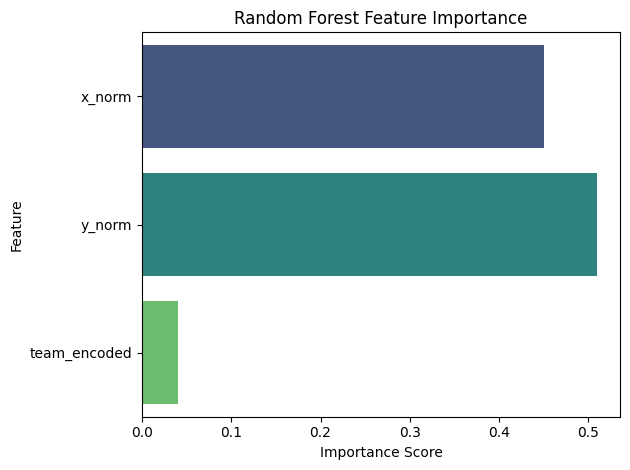

In [11]:
importances = models["RandomForest"].feature_importances_
sns.barplot(x=importances, y=features, orient='h', palette='viridis')
plt.title("Random Forest Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()